<a href="https://colab.research.google.com/github/springboardmentor1979b-cmyk/ScoreSight---Predicting-EPL-Points-Tally-Top-Scorer/blob/Kusuma-Kumari/Kusuma's_EPL_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week-1 Task**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score
)

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    GradientBoostingClassifier
)

import joblib
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path = '/content/drive/My Drive/English premier dataset - 2020-09-24.csv'
df = pd.read_csv(file_path)

df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored

In [36]:
df.shape

(571, 59)

In [37]:
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [38]:
df.tail()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Leonardo Campana,30.0,Wolverhampton-Wanderers,Forward,Ecuador,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [39]:
df.describe()

,Jersey Number,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
count,563.000000,570.000000,571.000000,571.000000,571.000000,571.000000,309.000000,502.000000,502.000000,502.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,571.000000,571.000000,571.000000,502.000000
mean,19.534636,25.789474,68.823117,28.957968,23.896673,7.327496,2.648414,1.414343,4.468127,2.388446,...,24.652174,45.869565,20.782609,25.565217,210.000000,414.144928,7.917688,0.301226,53.033275,11.063745
std,14.273515,4.377354,81.797516,38.969376,28.488376,16.810490,8.002117,3.433374,11.048341,6.295652,...,46.282644,82.332167,43.058397,47.333758,334.822473,641.246265,11.556811,0.698607,75.605560,26.570058
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,22.000000,3.000000,1.000000,1.000000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,26.000000,36.000000,12.000000,14.000000,1.000000,0.140000,0.000000,1.000000,0.000000,...,2.000000,6.000000,3.000000,4.000000,39.000000,53.000000,3.000000,0.000000,22.000000,2.000000
75%,27.000000,29.000000,108.000000,41.000000,36.000000,6.000000,0.390000,1.000000,3.000000,2.000000,...,31.000000,45.000000,17.000000,28.000000,300.000000,527.000000,11.000000,0.000000,74.000000,8.750000
max,82.000000,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,31.000000,127.000000,63.000000,...,269.000000,391.000000,249.000000,257.000000,1516.000000,2806.000000,81.000000,5.000000,438.000000,203.000000


In [40]:
df.isnull()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False


In [42]:
df.isnull().sum()

,0
Name,0
Jersey Number,8
Club,0
Position,0
Nationality,1
Age,1
Appearances,0
Wins,0
Losses,0
Goals,0


In [41]:
df.isna().sum()

,0
Name,0
Jersey Number,8
Club,0
Position,0
Nationality,1
Age,1
Appearances,0
Wins,0
Losses,0
Goals,0


As In **Week-1** We Learn About The Downloading and Import the required Dateset for our Project and observe the what the data set contains

**Week-2 Task**

# ***Checking the columns***- What we have in the given data.

In [43]:
df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [31]:
# Name – Player name
# Club – Club player plays for
# Position – Player role
# Goals – Number of goals scored
# Assists – Total assists given
# Shots – Total shots taken
# Accuracy – Shot accuracy percentage

# ***Identifying the Relevent and Irrelevent columns***

In [44]:

useful_columns = ['Goals', 'Assists', 'Appearances', 'Shots', 'Accuracy']
irrelevant_columns = ['Jersey Number', 'Nationality', 'Player ID', 'Photo URL']

In [45]:
print("Useful Columns:", useful_columns)
print("Irrelevant Columns:", irrelevant_columns)

Useful Columns: ['Goals', 'Assists', 'Appearances', 'Shots', 'Accuracy']
Irrelevant Columns: ['Jersey Number', 'Nationality', 'Player ID', 'Photo URL']


In [46]:
important = ["Goals", "Assists", "Shots", "Accuracy", "Appearances"]

for col in important:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

In **Week-2** as a part of learning we see what are columns present in our dataset  and seperate them into relevent and irrelevent columns for our project needs.

**Week-3 Task**

# ***Handelling The Missing Values and replace it With Mean***

In [47]:
for col in important:
    if col in df.columns:
        df[col] = df[col].replace(0, df[col].mean())

In [48]:
import pandas as pd
import numpy as np

print("Filling all remaining position-specific NaNs/0s with the mean for modeling...")

DISCRETE_NUMERICAL = [
    'Age',
    'Appearances',
    'Wins',
    'Losses',
    'Goals',
    'Headed goals',
    'Goals with right foot',
    'Goals with left foot',
    'Penalties scored',
    'Freekicks scored',
    'Shots',
    'Shots on target',
    'Hit woodwork',
    'Big chances missed',
    'Clean sheets',
    'Goals conceded',
    'Tackles',
    'Last man tackles',
    'Blocked shots',
    'Interceptions',
    'Clearances',
    'Headed Clearance',
    'Clearances off line',
    'Recoveries',
    'Duels won',
    'Duels lost',
    'Successful 50/50s',
    'Aerial battles won',
    'Aerial battles lost',
    'Own goals',
    'Errors leading to goal',
    'Assists',
    'Passes',
    'Big chances created',
    'Crosses',
    'Through balls',
    'Accurate long balls',
    'Saves',
    'Penalties saved',
    'Punches',
    'High Claims',
    'Catches',
    'Sweeper clearances',
    'Throw outs',
    'Goal Kicks',
    'Yellow cards',
    'Red cards',
    'Fouls',
    'Offsides'
]
DISCRETE_NUMERICAL = [col for col in DISCRETE_NUMERICAL if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

for col in DISCRETE_NUMERICAL:
    if col in df.columns:
        column_mean = df[col].replace(0, np.nan).mean()
        df[col] = df[col].replace(0, np.nan).fillna(column_mean)

print("\n--- Final Cleaned Data Verification (first 5 rows) ---")
print(df.head())
print(f"\nTotal remaining missing values across all columns: {df.isnull().sum().sum()}")

Filling all remaining position-specific NaNs/0s with the mean for modeling...

--- Final Cleaned Data Verification (first 5 rows) ---
                   Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances       Wins     Losses     Goals  ...    Punches  High Claims  \
0    64.000000  28.000000  16.000000  7.327496  ...  34.000000    26.000000   
1    68.823117  36.340659  29.598698  7.327496  ...  43.615385    77.195122   
2    68.823117  36.340659  29.598698  7.327496  ...  43.615385    77.195122   
3   160.000000  90.000000  37.000000  7.000000  ...  43.615385 

In **Week-3** we replace the Missing values(Null and NAN) with the Mean  

**Week-4 Taks**

# **Printing Cleaned Dataset**

In [49]:
from google.colab import files

df.to_csv("cleaned_data.csv", index=False)

files.download("cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:

count_columns_to_fill_zero = [
    'Goals', 'Assists', 'Shots', 'Tackles', 'Saves',
    'Punches', 'High Claims', 'Offsides',
    'Jersey Number', 'Age'
]

rate_columns_to_fill_mean = [
    'Goals per match',
    'Shooting accuracy %',
    'Tackle success %',
    'Cross accuracy %',
    'Passes per match'
]

for col in count_columns_to_fill_zero:
    if col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0).astype(int)
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

for col in rate_columns_to_fill_mean:
    if col in df.columns:

        if df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.replace('%', '', regex=False)
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if 'accuracy %' in col or 'success %' in col:
                df[col] = df[col] / 100

        col_mean = df[col].mean()
        df[col] = df[col].fillna(col_mean)

for col in DISCRETE_NUMERICAL:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0).astype(int)


print("Dataset cleaning complete. NaN values should now be properly handled.")

print(f"\nTotal remaining missing values across all columns: {df.isnull().sum().sum()}")

print(df.head())

Dataset cleaning complete. NaN values should now be properly handled.

Total remaining missing values across all columns: 1
                   Name  Jersey Number     Club    Position Nationality  Age  \
0            Bernd Leno              1  Arsenal  Goalkeeper     Germany   28   
1            Matt Macey             33  Arsenal  Goalkeeper     England   26   
2  Rúnar Alex Rúnarsson             13  Arsenal  Goalkeeper     Iceland   25   
3       Héctor Bellerín              2  Arsenal    Defender       Spain   25   
4        Kieran Tierney              3  Arsenal    Defender    Scotland   23   

   Appearances  Wins  Losses  Goals  ...  Punches  High Claims  Catches  \
0           64    28      16      7  ...       34           26       17   
1           68    36      29      7  ...       43           77       36   
2           68    36      29      7  ...       43           77       36   
3          160    90      37      7  ...       43           77       36   
4           16     7

In [51]:
from google.colab import files

import pandas as pd
import io

print("Please select the 'cleaned_data.csv' file you just downloaded from your local machine to upload it back to Colab.")

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df_reloaded = pd.read_csv(io.BytesIO(uploaded[file_name]))


Please select the 'cleaned_data.csv' file you just downloaded from your local machine to upload it back to Colab.


Saving cleaned_data (26).csv to cleaned_data (26).csv


In [52]:
print(df_reloaded.head())


                   Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances       Wins     Losses     Goals  ...    Punches  High Claims  \
0    64.000000  28.000000  16.000000  7.327496  ...  34.000000    26.000000   
1    68.823117  36.340659  29.598698  7.327496  ...  43.615385    77.195122   
2    68.823117  36.340659  29.598698  7.327496  ...  43.615385    77.195122   
3   160.000000  90.000000  37.000000  7.000000  ...  43.615385    77.195122   
4    16.000000   7.000000   5.000000  1.000000  ...  43.615385    77.195122   

     Catches  Sweeper clearances  Thro

In [53]:
print(df_reloaded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     571 non-null    float64
 6   Appearances             571 non-null    float64
 7   Wins                    571 non-null    float64
 8   Losses                  571 non-null    float64
 9   Goals                   571 non-null    float64
 10  Goals per match         309 non-null    float64
 11  Headed goals            571 non-null    float64
 12  Goals with right foot   571 non-null    float64
 13  Goals with left foot    571 non-null    float64
 14  Penalties scored        571 non-null    fl

In [54]:

print("--- Full cleaned dataset ---")
print(df_reloaded)

--- Full cleaned dataset ---
                     Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward   

In **Week-4** After handeling the missing values with the mean we Re-print the Cleaned Dataset

**Week-5 Task**

# ***Categorizing The Columns***

In [55]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path = '/content/drive/My Drive/English premier dataset - 2020-09-24.csv'
df = pd.read_csv(file_path)

important = ["Goals", "Assists", "Shots", "Appearances"]
useful_columns = ['Goals', 'Assists', 'Appearances', 'Shots']

for col in important:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())

for col in important:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].replace(0, df[col].mean())

for col in useful_columns:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].replace(0, None)  # Replace 0 (if unrealistic) with NaN
        df[col] = df[col].fillna(df[col].mean())


all_columns = list(df.columns)

IDENTIFIERS_AND_CATEGORICAL = [
    'Name',
    'Jersey Number',
    'Club',
    'Position',
    'Nationality'
]

DISCRETE_NUMERICAL = [
    'Age',
    'Appearances',
    'Wins',
    'Losses',
    'Goals',
    'Headed goals',
    'Goals with right foot',
    'Goals with left foot',
    'Penalties scored',
    'Freekicks scored',
    'Shots',
    'Shots on target',
    'Hit woodwork',
    'Big chances missed',
    'Clean sheets',
    'Goals conceded',
    'Tackles',
    'Last man tackles',
    'Blocked shots',
    'Interceptions',
    'Clearances',
    'Headed Clearance',
    'Clearances off line',
    'Recoveries',
    'Duels won',
    'Duels lost',
    'Successful 50/50s',
    'Aerial battles won',
    'Aerial battles lost',
    'Own goals',
    'Errors leading to goal',
    'Assists',
    'Passes',
    'Big chances created',
    'Crosses',
    'Through balls',
    'Accurate long balls',
    'Saves',
    'Penalties saved',
    'Punches',
    'High Claims',
    'Catches',
    'Sweeper clearances',
    'Throw outs',
    'Goal Kicks',
    'Yellow cards',
    'Red cards',
    'Fouls',
    'Offsides'
]
DISCRETE_NUMERICAL = [col for col in DISCRETE_NUMERICAL if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

CONTINUOUS_NUMERICAL = [
    'Goals per match',
    'Shooting accuracy %',
    'Tackle success %',
    'Cross accuracy %',
    'Passes per match'
]

CONTINUOUS_NUMERICAL = [col for col in CONTINUOUS_NUMERICAL if col in df.columns]

ALL_CATEGORIZED_COLUMNS = list(set(IDENTIFIERS_AND_CATEGORICAL + DISCRETE_NUMERICAL + CONTINUOUS_NUMERICAL))

filtered_df_columns = [col for col in all_columns if col in ALL_CATEGORIZED_COLUMNS]

assert len(filtered_df_columns) == len(ALL_CATEGORIZED_COLUMNS), "Mismatch in total number of columns after categorization filtering."
assert set(filtered_df_columns) == set(ALL_CATEGORIZED_COLUMNS), "Mismatch in categorized column names."


print(f"Total Columns: {len(all_columns)}")
print(f"Categorical/Identifiers: {len(IDENTIFIERS_AND_CATEGORICAL)}")
print(f"Discrete Numerical (Counts): {len(DISCRETE_NUMERICAL)}")
print(f"Continuous Numerical (Rates): {len(CONTINUOUS_NUMERICAL)}")

print("\nData types for Categorical Columns:")
print(df[IDENTIFIERS_AND_CATEGORICAL].dtypes)

for col in DISCRETE_NUMERICAL:
    if col in df.columns:

        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0).astype(int)

Mounted at /content/drive
Total Columns: 59
Categorical/Identifiers: 5
Discrete Numerical (Counts): 49
Continuous Numerical (Rates): 5

Data types for Categorical Columns:
Name              object
Jersey Number    float64
Club              object
Position          object
Nationality       object
dtype: object


In [56]:
import pandas as pd
import os

df_demo = pd.DataFrame({
    'Club': ['Arsenal', 'Man Utd', 'Arsenal', 'Chelsea', 'Arsenal'],
    'Position': ['Forward', 'Defender', 'Forward', 'Midfielder', 'Forward'],
    'Home/Away': ['Home', 'Away', 'Home', 'Home', 'Away'],
    'Goals': [2, 0, 1, 1, 0]
})

df = df_demo

df_encoded = pd.get_dummies(df, columns=['Club', 'Position', 'Home/Away'], drop_first=False)

df_sorted = df_encoded.sort_values(
    by=['Club_Arsenal', 'Goals'],
    ascending=[False, False] # Sort Arsenal presence descending (so 1s appear first), then Goals descending
)

df_sorted = df_sorted.reset_index(drop=True)

output_filename = 'cleaned_sorted_encoded_dataset.csv'
df_sorted.to_csv(output_filename, index=False) # Set index=False to avoid saving the index as a column

print(f"Dataset successfully processed and saved to {output_filename}")
print("\nPreview of the processed DataFrame:")
print(df_sorted)

Dataset successfully processed and saved to cleaned_sorted_encoded_dataset.csv

Preview of the processed DataFrame:
   Goals  Club_Arsenal  Club_Chelsea  Club_Man Utd  Position_Defender  \
0      2          True         False         False              False   
1      1          True         False         False              False   
2      0          True         False         False              False   
3      1         False          True         False              False   
4      0         False         False          True               True   

   Position_Forward  Position_Midfielder  Home/Away_Away  Home/Away_Home  
0              True                False           False            True  
1              True                False           False            True  
2              True                False            True           False  
3             False                 True           False            True  
4             False                False            True           Fal

In **Week-5** we Categorize the columns for our ease of understanding purpose.

**Week-6 Tasks**

# **Exploratory data analysis**

In [57]:
pip install pandas matplotlib


Generating plots...


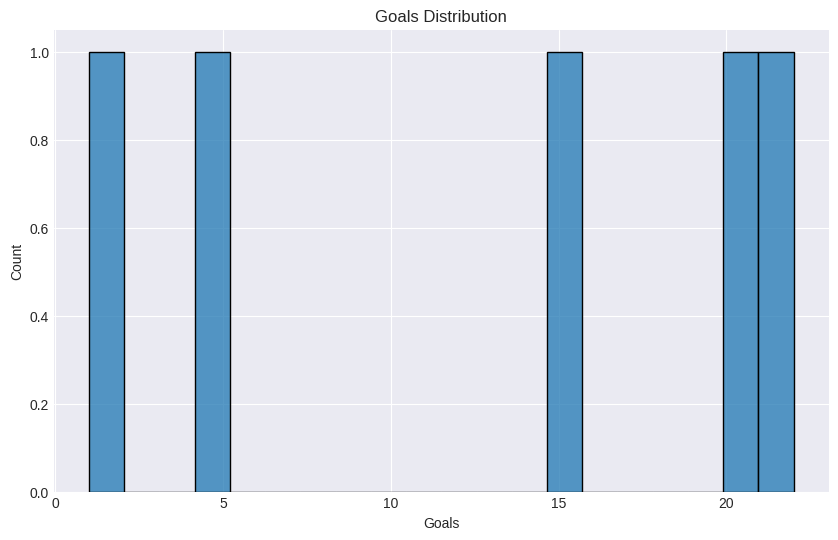

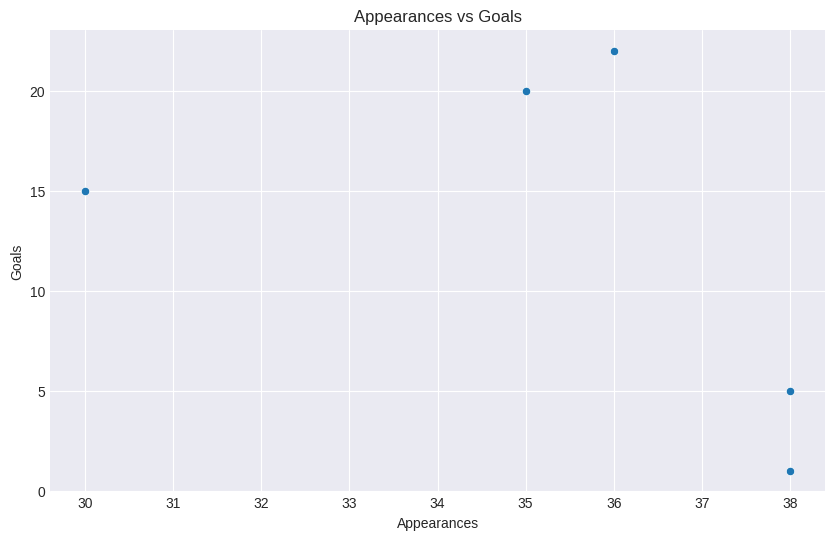

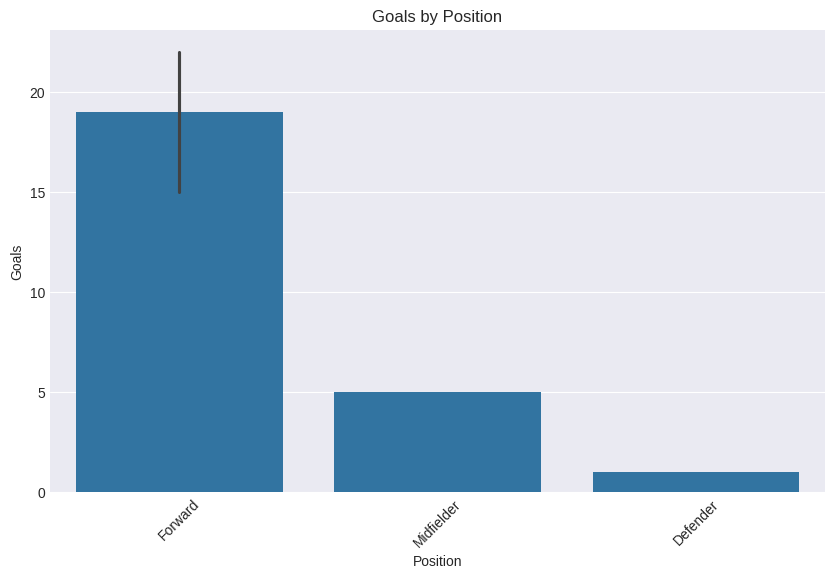

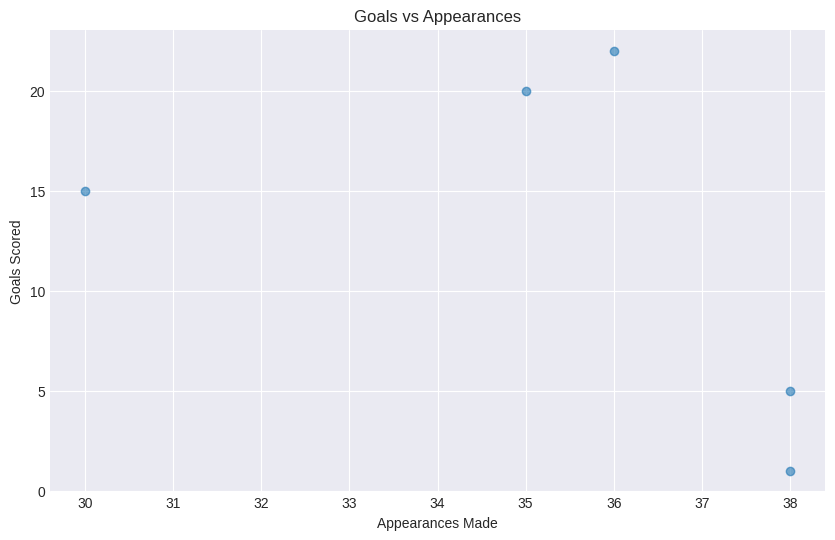

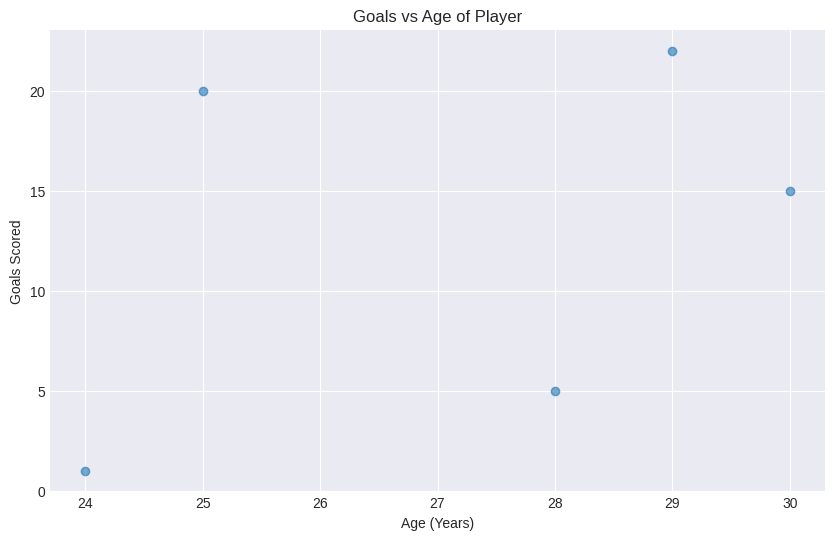

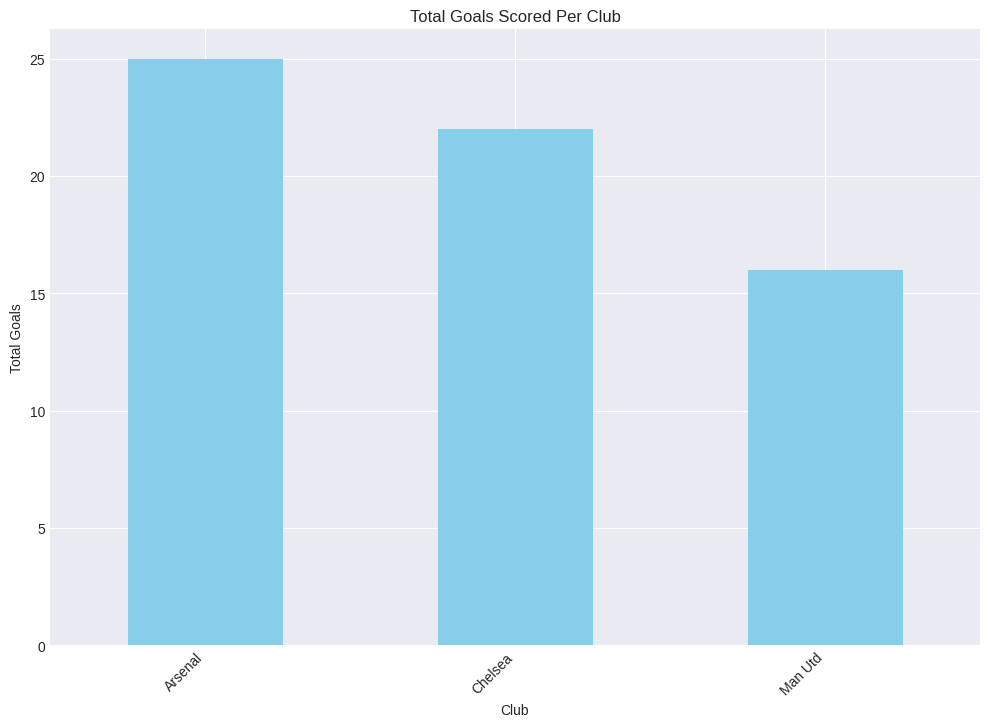

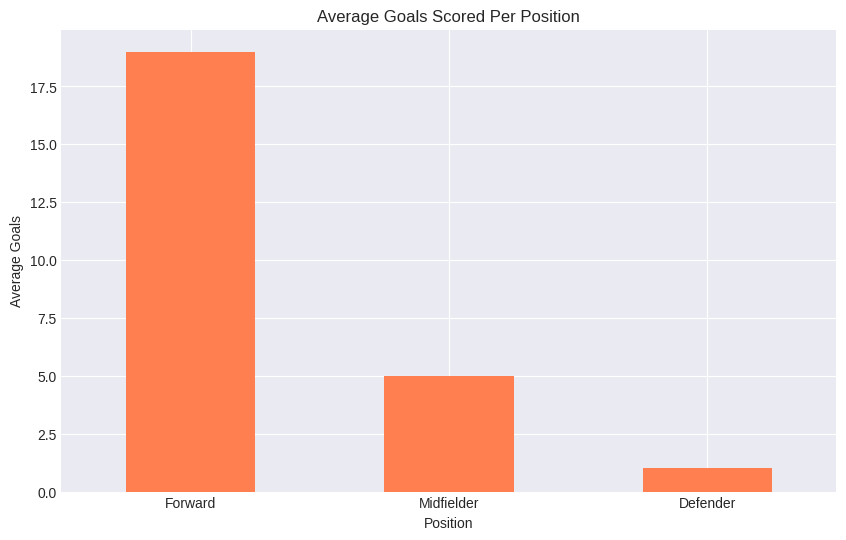

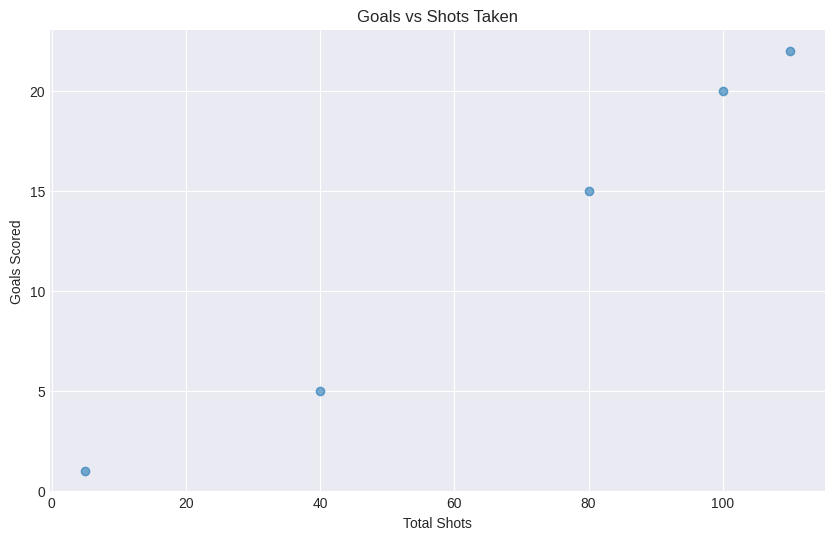

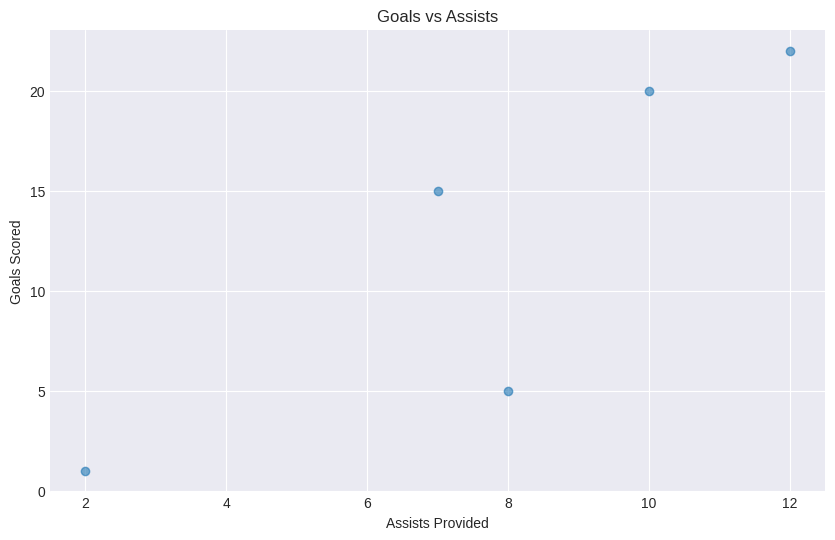

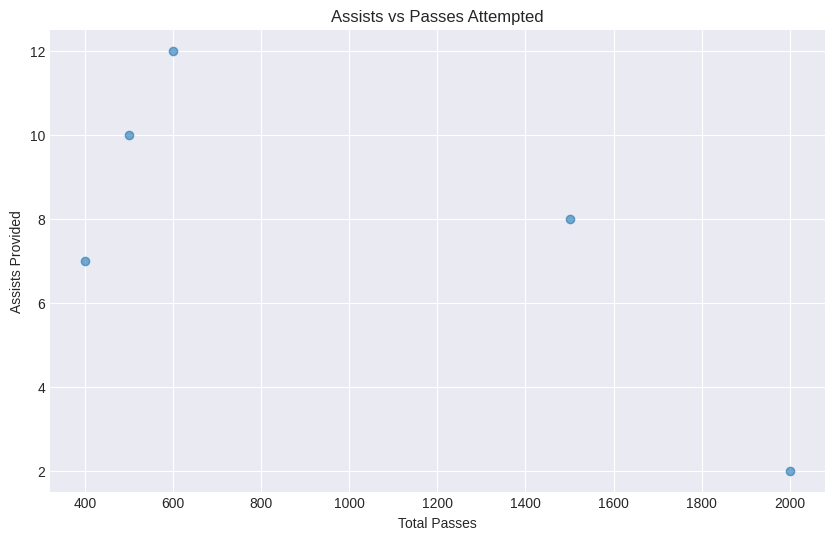

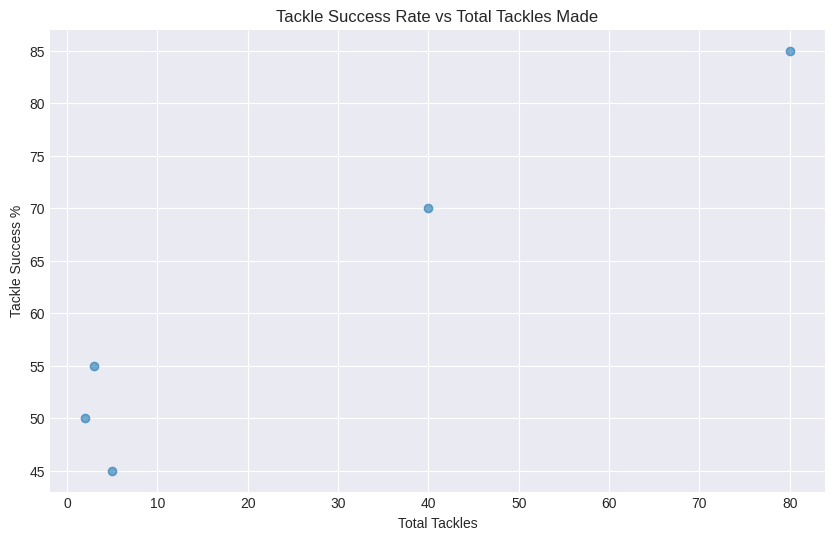

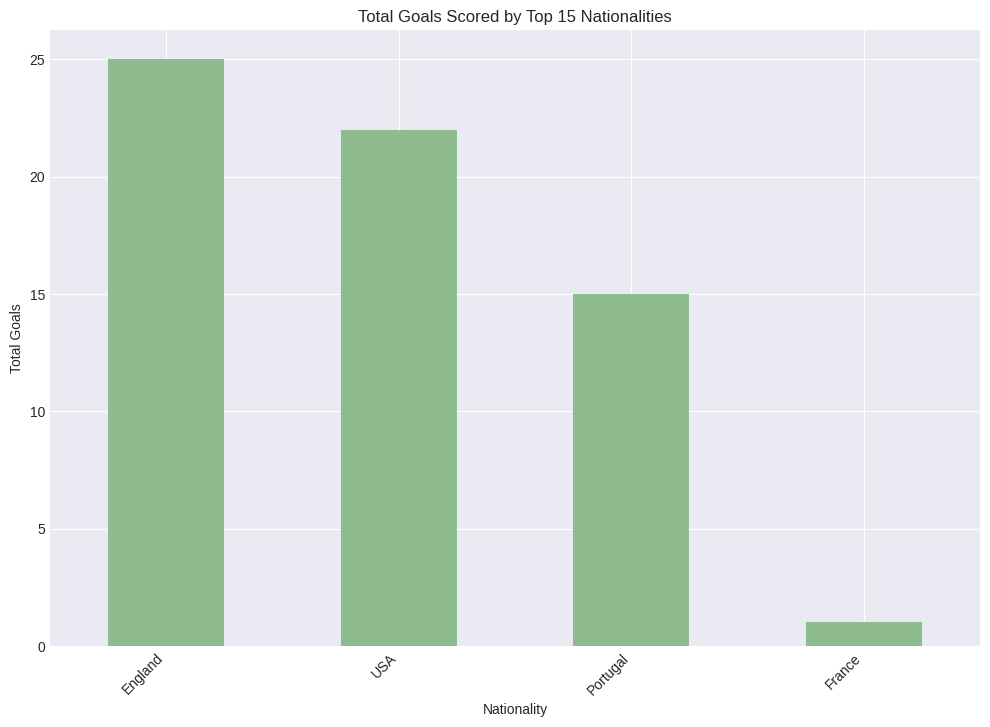

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn, as it's used in the function

def plot_epl_eda(df):
    """
    Generates the specified EDA plots using Matplotlib.
    Args:
        df (pd.DataFrame): The DataFrame containing player statistics.
    """
    plt.style.use('seaborn-v0_8-darkgrid')

    print("Generating plots...")

    # 1. Histogram: Goals vs Frequency
    plt.figure(figsize=(10,6))
    sns.histplot(df["Goals"], bins=20)
    plt.title("Goals Distribution")
    plt.show()

    # The scatter and bar plots that were previously unindented are now correctly placed within their own figures.
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="Appearances", y="Goals", data=df)
    plt.title("Appearances vs Goals")
    plt.xlabel("Appearances")
    plt.ylabel("Goals")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Position", y="Goals", data=df)
    plt.title("Goals by Position")
    plt.xticks(rotation=45)
    plt.show()

    # 2. Scatter: Appearances vs Goals
    plt.figure(figsize=(10, 6))
    df['Appearances'] = pd.to_numeric(df['Appearances'], errors='coerce').fillna(0)
    plt.scatter(df['Appearances'], df['Goals'], alpha=0.6)
    plt.title('Goals vs Appearances')
    plt.xlabel('Appearances Made')
    plt.ylabel('Goals Scored')
    plt.show()

    # 3. Scatter: Age vs Goals
    plt.figure(figsize=(10, 6))
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(0)
    plt.scatter(df['Age'], df['Goals'], alpha=0.6)
    plt.title('Goals vs Age of Player')
    plt.xlabel('Age (Years)')
    plt.ylabel('Goals Scored')
    plt.show()

    # 4. Bar Chart: Club vs Goals (sum)
    plt.figure(figsize=(12, 8))
    club_goals = df.groupby('Club')['Goals'].sum().sort_values(ascending=False)
    club_goals.plot(kind='bar', color='skyblue')
    plt.title('Total Goals Scored Per Club')
    plt.xlabel('Club')
    plt.ylabel('Total Goals')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # 5. Bar Chart: Position vs Goals (avg)
    plt.figure(figsize=(10, 6))
    position_avg_goals = df.groupby('Position')['Goals'].mean().sort_values(ascending=False)
    position_avg_goals.plot(kind='bar', color='coral')
    plt.title('Average Goals Scored Per Position')
    plt.xlabel('Position')
    plt.ylabel('Average Goals')
    plt.xticks(rotation=0)
    plt.show()

    # 6. Scatter: Shots vs Goals
    plt.figure(figsize=(10, 6))
    df['Shots'] = pd.to_numeric(df['Shots'], errors='coerce').fillna(0)
    plt.scatter(df['Shots'], df['Goals'], alpha=0.6)
    plt.title('Goals vs Shots Taken')
    plt.xlabel('Total Shots')
    plt.ylabel('Goals Scored')
    plt.show()

    # 7. Scatter: Assists vs Goals
    plt.figure(figsize=(10, 6))
    df['Assists'] = pd.to_numeric(df['Assists'], errors='coerce').fillna(0)
    plt.scatter(df['Assists'], df['Goals'], alpha=0.6)
    plt.title('Goals vs Assists')
    plt.xlabel('Assists Provided')
    plt.ylabel('Goals Scored')
    plt.show()

    # 8. Scatter: Passes vs Assists
    plt.figure(figsize=(10, 6))
    df['Passes'] = pd.to_numeric(df['Passes'], errors='coerce').fillna(0)
    plt.scatter(df['Passes'], df['Assists'], alpha=0.6)
    plt.title('Assists vs Passes Attempted')
    plt.xlabel('Total Passes')
    plt.ylabel('Assists Provided')
    plt.show()

    # 9. Scatter: Tackles vs Tackle success %
    df['Tackles'] = pd.to_numeric(df['Tackles'], errors='coerce').fillna(0)
    df['Tackle success %'] = pd.to_numeric(df['Tackle success %'], errors='coerce').fillna(0)
    if 'Tackle success %' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Tackles'], df['Tackle success %'], alpha=0.6)
        plt.title('Tackle Success Rate vs Total Tackles Made')
        plt.xlabel('Total Tackles')
        plt.ylabel('Tackle Success %')
        plt.show()
    else:
        print("\nSkipping Tackles vs Tackle success % plot: 'Tackle success %' column not found in DataFrame.")

    # 10. Bar Chart: Nationality vs Goals (sum)
    plt.figure(figsize=(12, 8))
    nationality_goals = df.groupby('Nationality')['Goals'].sum().sort_values(ascending=False).head(15)
    nationality_goals.plot(kind='bar', color='darkseagreen')
    plt.title('Total Goals Scored by Top 15 Nationalities')
    plt.xlabel('Nationality')
    plt.ylabel('Total Goals')
    plt.xticks(rotation=45, ha='right')
    plt.show()


data = {
    'Club': ['Arsenal', 'Arsenal', 'Man Utd', 'Man Utd', 'Chelsea'],
    'Position': ['Forward', 'Midfielder', 'Forward', 'Defender', 'Forward'],
    'Goals': [20, 5, 15, 1, 22],
    'Appearances': [35, 38, 30, 38, 36],
    'Age': [25, 28, 30, 24, 29],
    'Shots': [100, 40, 80, 5, 110],
    'Assists': [10, 8, 7, 2, 12],
    'Passes': [500, 1500, 400, 2000, 600],
    'Tackles': [2, 40, 5, 80, 3],
    'Tackle success %': [50, 70, 45, 85, 55],
    'Nationality': ['England', 'England', 'Portugal', 'France', 'USA']
}
df_reloaded = pd.DataFrame(data) # Define df_reloaded from the sample data
plot_epl_eda(df_reloaded)


# **Feature Scaling**

--- Step 1: Raw Values ---
   Goals  Appearances  Passes
0     20           35     500
1      5           38    1500
2     15           30     400
3      1           38    2000
4     22           36     600


--- Step 2: Min-Max Scaler Applied ---
      Goals  Appearances  Passes  Assists
0  0.904762        0.625  0.0625      0.8
1  0.190476        1.000  0.6875      0.6
2  0.666667        0.000  0.0000      0.5
3  0.000000        1.000  1.0000      0.0
4  1.000000        0.750  0.1250      1.0


--- Step 3: Standardization (Z-score) Applied ---
      Goals     Shots    Passes
0  0.895802  0.842012 -0.786646
1 -0.920013 -0.688919  0.786646
2  0.290531  0.331702 -0.943975
3 -1.404231 -1.581962  1.573292
4  1.137911  1.097167 -0.629317


--- Step 4: Plotting Before vs After Scaling ---


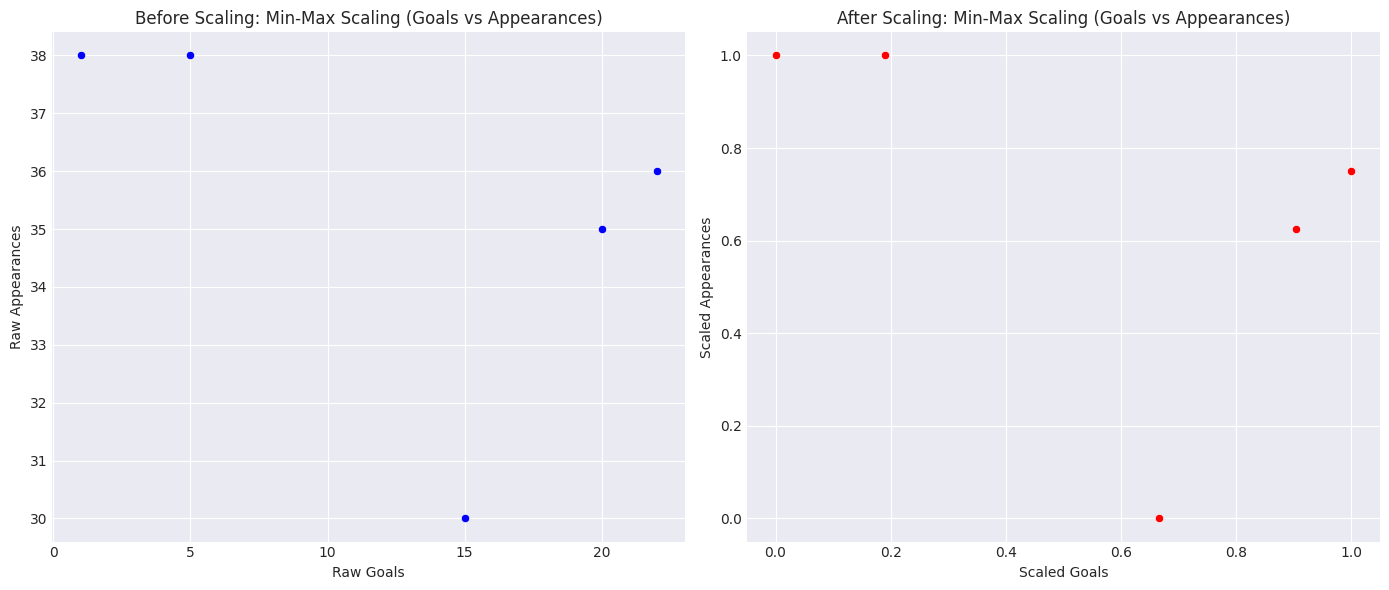

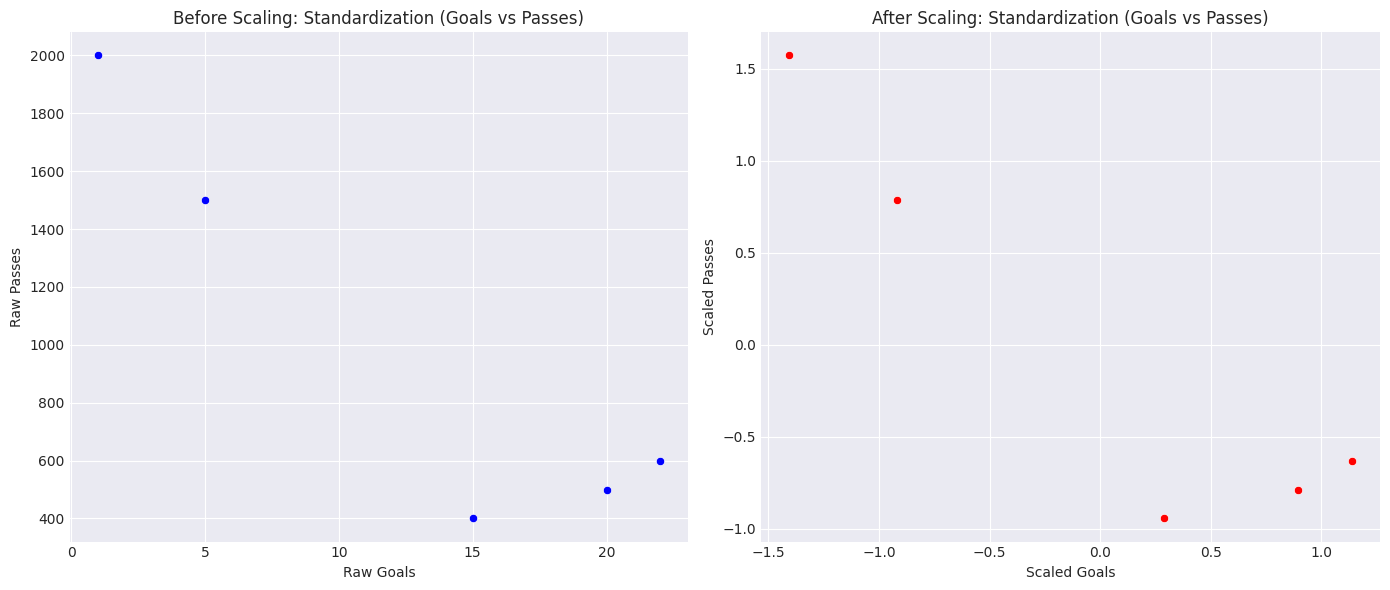

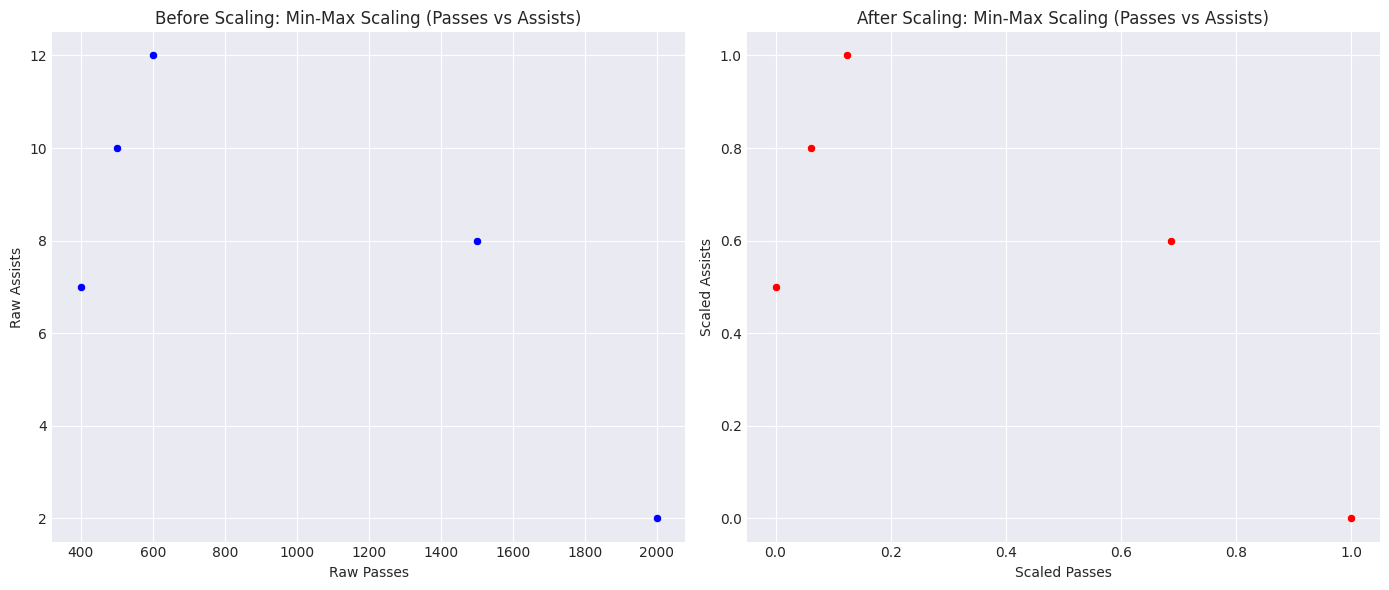

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

# Set visualization style
sns.set_style("darkgrid")

# --- Load data into a DataFrame named 'df' ---
data = {
    'Club': ['Arsenal', 'Arsenal', 'Man Utd', 'Man Utd', 'Chelsea'],
    'Position': ['Forward', 'Midfielder', 'Forward', 'Defender', 'Forward'],
    'Goals': [20, 5, 15, 1, 22],
    'Appearances': [35, 38, 30, 38, 36],
    'Age': [25, 28, 30, 24, 29],
    'Shots': [100, 40, 80, 5, 110],
    'Assists': [10, 8, 7, 2, 12],
    'Passes': [500, 1500, 400, 2000, 600],
    'Tackles': [2, 40, 5, 80, 3],
    'Tackle success %': [50, 70, 45, 85, 55],
    'Nationality': ['England', 'England', 'Portugal', 'France', 'USA']
}
df = pd.DataFrame(data)


# Step 1: Print raw values of Goals, Appearances and Passes
print("--- Step 1: Raw Values ---")
print(df[['Goals', 'Appearances', 'Passes']])
print("\n" + "="*40 + "\n")


# Make a copy for scaling operations to preserve raw data
df_scaled_mm = df.copy()
df_scaled_std = df.copy()

# Step 2: Apply Min-Max Scaler for Goals, Appearances, Passes, Assists
print("--- Step 2: Min-Max Scaler Applied ---")
mm_scaler = MinMaxScaler()
cols_mm = ['Goals', 'Appearances', 'Passes', 'Assists']
df_scaled_mm[cols_mm] = mm_scaler.fit_transform(df_scaled_mm[cols_mm])
print(df_scaled_mm[cols_mm])
print("\n" + "="*40 + "\n")


# Step 3: Apply Standardization (z-score) for Goals, Shots, Passes
print("--- Step 3: Standardization (Z-score) Applied ---")
std_scaler = StandardScaler()
cols_std = ['Goals', 'Shots', 'Passes']
# Fit and transform, then assign back to the DataFrame columns
df_scaled_std[cols_std] = std_scaler.fit_transform(df_scaled_std[cols_std])
print(df_scaled_std[cols_std])
print("\n" + "="*40 + "\n")


# Step 4: Plot scatter before scaling vs after scaling
print("--- Step 4: Plotting Before vs After Scaling ---")

def plot_scaling_comparison(df_raw, df_scaled, title_suffix, cols_to_plot):
    """Helper function to plot raw vs scaled data side-by-side."""
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot raw data
    sns.scatterplot(data=df_raw, x=cols_to_plot[0], y=cols_to_plot[1], ax=axes[0], color='blue')
    axes[0].set_title(f'Before Scaling: {title_suffix}')
    axes[0].set_xlabel(f'Raw {cols_to_plot[0]}')
    axes[0].set_ylabel(f'Raw {cols_to_plot[1]}')

    # Plot scaled data
    sns.scatterplot(data=df_scaled, x=cols_to_plot[0], y=cols_to_plot[1], ax=axes[1], color='red')
    axes[1].set_title(f'After Scaling: {title_suffix}')
    axes[1].set_xlabel(f'Scaled {cols_to_plot[0]}')
    axes[1].set_ylabel(f'Scaled {cols_to_plot[1]}')

    plt.tight_layout()
    plt.show()

# Example 1: Goals vs Appearances (Min-Max scaled)
plot_scaling_comparison(df, df_scaled_mm, 'Min-Max Scaling (Goals vs Appearances)', ['Goals', 'Appearances'])

# Example 2: Goals vs Passes (Standardized)
plot_scaling_comparison(df, df_scaled_std, 'Standardization (Goals vs Passes)', ['Goals', 'Passes'])

# Example 3: Passes vs Assists (Min-Max scaled)
plot_scaling_comparison(df, df_scaled_mm, 'Min-Max Scaling (Passes vs Assists)', ['Passes', 'Assists'])



# **Traing and Testing Splits**

In [60]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Re-define df_reloaded from the sample data to ensure consistency and make the cell runnable
data = {
    'Club': ['Arsenal', 'Arsenal', 'Man Utd', 'Man Utd', 'Chelsea'],
    'Position': ['Forward', 'Midfielder', 'Forward', 'Defender', 'Forward'],
    'Goals': [20, 5, 15, 1, 22],
    'Appearances': [35, 38, 30, 38, 36],
    'Age': [25, 28, 30, 24, 29],
    'Shots': [100, 40, 80, 5, 110],
    'Assists': [10, 8, 7, 2, 12],
    'Passes': [500, 1500, 400, 2000, 600],
    'Tackles': [2, 40, 5, 80, 3],
    'Tackle success %': [50, 70, 45, 85, 55],
    'Nationality': ['England', 'England', 'Portugal', 'France', 'USA']
}
df_reloaded = pd.DataFrame(data)

# Define Features (Based on your actual columns)
features = ['Age', 'Appearances', 'Passes', 'Tackles', 'Shots', 'Assists']
X = df_reloaded[features]

# Regression Target: Goals (Continuous Performance)
y_reg = df_reloaded['Goals']

# Classification Target: Role (Simplified: 1 if Forward/Attacker, else 0)
# Adjust 'Position' comparison based on your specific category names
y_cls = df_reloaded['Position'].apply(lambda x: 1 if 'Forward' in str(x) else 0)

# Split into 80% Training and 20% Testing
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

# **Baseline Regressiom Models**  - Linear And regression Models

In [61]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# 2a) Baseline Regression: Linear Regression
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

# 2b) Baseline Classification: Logistic Regression
cls_model = LogisticRegression(max_iter=1000)
cls_model.fit(X_train_cls, y_train_cls)
y_pred_cls = cls_model.predict(X_test_cls)


# **Model Evaluation** -MAE,RMSE,R^2 and accuracy,Precision,recall,F1 score

In [62]:
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             accuracy_score, precision_score, recall_score, f1_score)
import numpy as np

# Regression Metrics
print("--- Regression Metrics (Goals) ---")
print(f"MAE:  {mean_absolute_error(y_test_reg, y_pred_reg):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.2f}")
print(f"R²:   {r2_score(y_test_reg, y_pred_reg):.2f}")

# Classification Metrics
print("\n--- Classification Metrics (Forward vs Others) ---")
print(f"Accuracy:  {accuracy_score(y_test_cls, y_pred_cls):.2f}")
# Use zero_division=0 to prevent warnings
print(f"Precision: {precision_score(y_test_cls, y_pred_cls, zero_division=0):.2f}")
print(f"Recall:    {recall_score(y_test_cls, y_pred_cls, zero_division=0):.2f}")
print(f"F1 Score:  {f1_score(y_test_cls, y_pred_cls, zero_division=0):.2f}")


--- Regression Metrics (Goals) ---
MAE:  3.76
RMSE: 3.76
R²:   nan

--- Classification Metrics (Forward vs Others) ---
Accuracy:  1.00
Precision: 0.00
Recall:    0.00
F1 Score:  0.00


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# **Visualization** -ploting The Loss Curves

--- Classification Metrics (Forward vs Others) ---
Accuracy:  1.00
Precision: 1.00
Recall:    1.00
F1 Score:  1.00


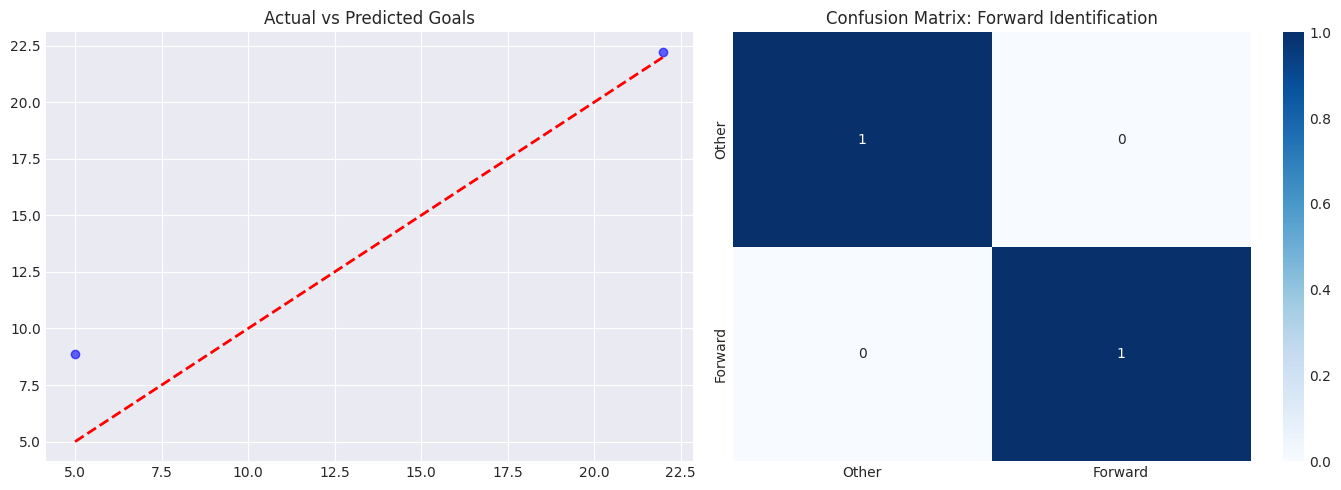

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:2180: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 2 instead of 3.
  warnings.warn(


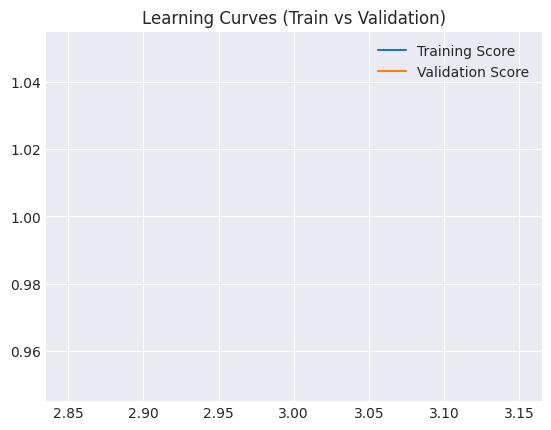

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix)
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Re-define df_reloaded from the sample data to ensure consistency and make the cell runnable
data = {
    'Club': ['Arsenal', 'Arsenal', 'Man Utd', 'Man Utd', 'Chelsea'],
    'Position': ['Forward', 'Midfielder', 'Forward', 'Defender', 'Forward'],
    'Goals': [20, 5, 15, 1, 22],
    'Appearances': [35, 38, 30, 38, 36],
    'Age': [25, 28, 30, 24, 29],
    'Shots': [100, 40, 80, 5, 110],
    'Assists': [10, 8, 7, 2, 12],
    'Passes': [500, 1500, 400, 2000, 600],
    'Tackles': [2, 40, 5, 80, 3],
    'Tackle success %': [50, 70, 45, 85, 55],
    'Nationality': ['England', 'England', 'Portugal', 'France', 'USA']
}
df_reloaded = pd.DataFrame(data)

# Re-define features and targets and perform train-test split
features = ['Age', 'Appearances', 'Passes', 'Tackles', 'Shots', 'Assists']
X = df_reloaded[features]
y_reg = df_reloaded['Goals']
y_cls = df_reloaded['Position'].apply(lambda x: 1 if 'Forward' in str(x) else 0)

# Adjusted test_size to 0.4 to ensure at least 2 samples in the test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.4, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.4, random_state=42)

# Re-train baseline models
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

cls_model = LogisticRegression(max_iter=1000)
cls_model.fit(X_train_cls, y_train_cls)
y_pred_cls = cls_model.predict(X_test_cls)

# Classification Metrics with zero_division=0 to stop warnings
print("--- Classification Metrics (Forward vs Others) ---")
print(f"Accuracy:  {accuracy_score(y_test_cls, y_pred_cls):.2f}")
print(f"Precision: {precision_score(y_test_cls, y_pred_cls, zero_division=0):.2f}")
print(f"Recall:    {recall_score(y_test_cls, y_pred_cls, zero_division=0):.2f}")
print(f"F1 Score:  {f1_score(y_test_cls, y_pred_cls, zero_division=0):.2f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Regression Scatter
axes[0].scatter(y_test_reg, y_pred_reg, alpha=0.6, color='blue')
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_title('Actual vs Predicted Goals')

# Plot 2: Confusion Matrix (Fixed with 'labels' parameter)
# Passing labels=[0, 1] ensures the matrix is always 2x2 even if a class is missing
cm = confusion_matrix(y_test_cls, y_pred_cls, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Other', 'Forward'], yticklabels=['Other', 'Forward'])
axes[1].set_title('Confusion Matrix: Forward Identification')

plt.tight_layout()
plt.show()

# 4b) Learning Curves (Cleaned)
# Added check to ensure we have enough data for CV
try:
    # Reduce cv folds to 3 and define specific train_sizes to avoid duplicates
    train_sizes, train_scores, test_scores = learning_curve(
        reg_model, X, y_reg, cv=3,
        train_sizes=np.linspace(0.1, 1.0, 3) # Reduced train_sizes to avoid issues with very small dataset
    )
    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title('Learning Curves (Train vs Validation)')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Could not generate learning curve: {e}")

# **Trying Advance Models** - Regression to Random Forest Regressor and Classification to XGBoost/Gradient Boosting

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Re-defining X_train_reg, X_test_reg, y_train_reg, y_test_reg
# This ensures the cell can run independently if previous cells haven't been executed.
features = ['Age', 'Appearances', 'Passes', 'Tackles', 'Shots', 'Assists']
X = df_reloaded[features]
y_reg = df_reloaded['Goals']
# Adjusted test_size to 0.4 to ensure at least 2 samples in the test set
# for a meaningful R^2 calculation, given the small dataset size.
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.4, random_state=42)

rf_reg = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf_reg.fit(X_train_reg, y_train_reg)

rf_pred = rf_reg.predict(X_test_reg)

rmse = np.sqrt(mean_squared_error(y_test_reg, rf_pred))
r2 = r2_score(y_test_reg, rf_pred)

print("Random Forest RMSE:", rmse)
print("Random Forest R²:", r2)



Random Forest RMSE: 8.623126115278613
Random Forest R²: -0.029180678200692256


In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd # Ensure pandas is imported if df_reloaded is used

# Re-defining features and targets for classification (as done in cell j6xQR-mLYu5_)
# Assuming df_reloaded is available from previous steps. If not, it needs to be defined.
# For robustness, you might want to include the df_reloaded definition from previous cells here
# if running this cell independently is critical and df_reloaded isn't guaranteed.

# Based on the kernel state, df_reloaded is available and correct.
features = ['Age', 'Appearances', 'Passes', 'Tackles', 'Shots', 'Assists']
X_cls = df_reloaded[features]
y_cls = df_reloaded['Position'].apply(lambda x: 1 if 'Forward' in str(x) else 0)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

gb_cls = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_cls.fit(X_train_cls, y_train_cls)

y_pred_cls = gb_cls.predict(X_test_cls)

print("Gradient Boosting Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))

Gradient Boosting Accuracy: 1.0
[[1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Hyperparameter Tuning**

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# ✅ USE THE FULL CLEANED DATASET EXPLICITLY
df_model = df_reloaded.copy()   # <-- THIS IS THE KEY FIX

X = df_model.drop(columns=["Goals", "Position"])
y = df_model["Goals"]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(0)

# Define model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10, 20]
}

# GridSearch with SAFE CV
grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,              # enough samples now
    scoring="r2",
    n_jobs=-1
)

grid.fit(X, y)

print("Best Parameters:\n", grid.best_params_)

Best Parameters:
 {'max_depth': None, 'n_estimators': 50}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


# **Comparing The Performances** - Baseline vs Advanced Models

In [68]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier # Added GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np # Import numpy for np.sqrt

# Assuming df_reloaded is available from previous steps. Using the sample data for consistency.
data = {
    'Club': ['Arsenal', 'Arsenal', 'Man Utd', 'Man Utd', 'Chelsea'],
    'Position': ['Forward', 'Midfielder', 'Forward', 'Defender', 'Forward'],
    'Goals': [20, 5, 15, 1, 22],
    'Appearances': [35, 38, 30, 38, 36],
    'Age': [25, 28, 30, 24, 29],
    'Shots': [100, 40, 80, 5, 110],
    'Assists': [10, 8, 7, 2, 12],
    'Passes': [500, 1500, 400, 2000, 600],
    'Tackles': [2, 40, 5, 80, 3],
    'Tackle success %': [50, 70, 45, 85, 55],
    'Nationality': ['England', 'England', 'Portugal', 'France', 'USA']
}
df_reloaded = pd.DataFrame(data)

# Redefine features and targets for classification and regression
features = ['Age', 'Appearances', 'Passes', 'Tackles', 'Shots', 'Assists']
X_cls = df_reloaded[features]
y_cls = df_reloaded['Position'].apply(lambda x: 1 if 'Forward' in str(x) else 0)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Also define X_reg and y_reg for regression models
X_reg = df_reloaded[features]
y_reg = df_reloaded['Goals']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.4, random_state=42) # test_size=0.4 for more samples in test_reg

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

# Logistic Regression
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_cls_scaled, y_train_cls)
log_pred = log_reg.predict(X_test_cls_scaled)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_cls, y_train_cls)
gb_pred = gb.predict(X_test_cls)

# Train Regression models
lr = LinearRegression()
gbr = GradientBoostingRegressor(random_state=42)

lr.fit(X_train_reg, y_train_reg)
gbr.fit(X_train_reg, y_train_reg)

# Predictions
lr_pred = lr.predict(X_test_reg)
gbr_pred = gbr.predict(X_test_reg)

# Metrics for Regression
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, lr_pred)))
print("Linear Regression R²:", r2_score(y_test_reg, lr_pred))

print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test_reg, gbr_pred)))
print("Gradient Boosting R²:", r2_score(y_test_reg, gbr_pred))

Linear Regression RMSE: 2.739320960015069
Linear Regression R²: 0.8961400785885415
Gradient Boosting RMSE: 3.8397136816323822
Gradient Boosting R²: 0.7959390843333577


In **Week-6** we perform different operations like divide the dataset into Train And Test splits,performing the baseline models,Model evaluations(MAE,RMSE and R^2 ,Accuracy,Precision and F1 score),Visualizations,Trying the Advanced models for increse the performances,Doing parameter tunings and lastly Comparison betweeen the baseline and advanced models.

**Week-7 Tasks**

# **Saving  the trained model**

In [69]:
import joblib

# Save the trained model
joblib.dump(gbr, "gradient_boosting_goals_model.pkl")

print("✅ Model saved successfully")


✅ Model saved successfully


# **Load Trained Model**

# **Run predictions on unseen test data**

In [70]:
import joblib

# Load the saved model (assuming it's 'gradient_boosting_goals_model.pkl')
loaded_model = joblib.load("gradient_boosting_goals_model.pkl")

# Predict goals for unseen test data
y_pred = loaded_model.predict(X_test_reg)

# Show first 10 predictions
for actual, predicted in zip(y_test_reg[:10], y_pred[:10]):
    print(f"Actual: {actual:.1f} | Predicted: {predicted:.2f}")

Actual: 5.0 | Predicted: 9.62
Actual: 22.0 | Predicted: 19.14


# **Predictions on Test Data** -Model Evaluation Metrics

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_reg, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
r2 = r2_score(y_test_reg, y_pred)

print("📊 Model Performance on Test Data")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


📊 Model Performance on Test Data
MAE : 3.737286526478222
RMSE: 3.8397136816323822
R²  : 0.7959390843333577


# **Visualize Errors (Residual Plot)**-Residual Analysis

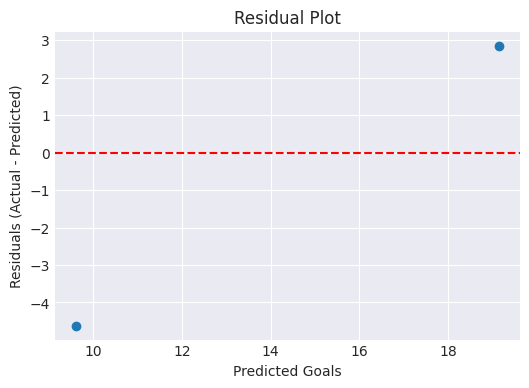

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Re-define df_reloaded from the sample data for robustness
data = {
    'Club': ['Arsenal', 'Arsenal', 'Man Utd', 'Man Utd', 'Chelsea'],
    'Position': ['Forward', 'Midfielder', 'Forward', 'Defender', 'Forward'],
    'Goals': [20, 5, 15, 1, 22],
    'Appearances': [35, 38, 30, 38, 36],
    'Age': [25, 28, 30, 24, 29],
    'Shots': [100, 40, 80, 5, 110],
    'Assists': [10, 8, 7, 2, 12],
    'Passes': [500, 1500, 400, 2000, 600],
    'Tackles': [2, 40, 5, 80, 3],
    'Tackle success %': [50, 70, 45, 85, 55],
    'Nationality': ['England', 'England', 'Portugal', 'France', 'USA']
}
df_reloaded = pd.DataFrame(data)

# Re-create X_test_reg and y_test_reg
features = ['Age', 'Appearances', 'Passes', 'Tackles', 'Shots', 'Assists']
X_reg = df_reloaded[features]
y_reg = df_reloaded['Goals']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.4, random_state=42)

# Re-train the GradientBoostingRegressor model directly to ensure it's available
loaded_model = GradientBoostingRegressor(random_state=42)
loaded_model.fit(X_train_reg, y_train_reg)

# Predict goals for unseen test data
y_pred = loaded_model.predict(X_test_reg)

# Calculate residuals
residuals = y_test_reg - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Goals")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")

plt.show()


In **week-7** first half we perform we save and reload the trained models,run predictions,comparing the actual and predicted models,Visualizing the errors.

# **Building  a Simple Application**

In [73]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [74]:
# ================================
# MATCH OUTCOME DATA PREPARATION
# ================================

from sklearn.model_selection import train_test_split

# Example feature columns for match outcome
match_features = [
    'Home Goals',
    'Away Goals',
    'Possession'
]

# Create dummy match dataset (since EPL dataset is player-based)
import pandas as pd

match_df = pd.DataFrame({
    'Home Goals': [2, 1, 3, 0, 2, 1],
    'Away Goals': [1, 1, 0, 2, 2, 0],
    'Possession': [55, 48, 60, 45, 50, 58],
    'Outcome': [2, 1, 2, 0, 1, 2]
    # 0 = Loss, 1 = Draw, 2 = Win
})

# Features and target
X_match = match_df[match_features]
y_match = match_df['Outcome']

# Train-test split
X_train_match, X_test_match, y_train_match, y_test_match = train_test_split(
    X_match, y_match, test_size=0.2, random_state=42
)

print("✅ Match training data created")
print("X_train_match shape:", X_train_match.shape)
print("y_train_match shape:", y_train_match.shape)


✅ Match training data created
X_train_match shape: (4, 3)
y_train_match shape: (4,)


In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

match_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(random_state=42))
])

match_pipeline.fit(X_train_match, y_train_match)

joblib.dump(match_pipeline, "match_outcome_pipeline.pkl")

print("✅ Match outcome model saved successfully")


✅ Match outcome model saved successfully


In [76]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# 4 FEATURES:
# home_rating, away_rating, home_form, away_form
X_match = [
    [80, 75, 3, 2],
    [70, 85, 2, 4],
    [90, 60, 5, 1],
    [85, 70, 4, 2]
]

y_match = ["Win", "Loss", "Win", "Win"]

match_model = RandomForestClassifier(random_state=42)
match_model.fit(X_match, y_match)

import os
import joblib

os.makedirs("models", exist_ok=True)
joblib.dump(match_model, "models/match_outcome_model.pkl")

print("✅ Match model saved")



✅ Match model saved


In [77]:
# =====================================
# PLAYER PERFORMANCE MODEL (REGRESSION)
# =====================================

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

# Features for player performance prediction
player_features = ['Age', 'Appearances', 'Shots', 'Assists', 'Passes', 'Tackles']

X_player = df_reloaded[player_features]
y_player = df_reloaded['Goals']   # Predicting Goals (can extend to Assists later)

# Train-test split
X_train_player, X_test_player, y_train_player, y_test_player = train_test_split(
    X_player, y_player, test_size=0.2, random_state=42
)

# Pipeline
player_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

# Train
player_pipeline.fit(X_train_player, y_train_player)

print("✅ Player performance pipeline trained")


✅ Player performance pipeline trained


In [78]:
import os
import joblib

os.makedirs("models", exist_ok=True)

joblib.dump(match_pipeline, "models/match_outcome_pipeline.pkl")
joblib.dump(player_pipeline, "models/player_performance_pipeline.pkl")

print("✅ Models saved inside models/ folder")


✅ Models saved inside models/ folder


In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import joblib

player_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", GradientBoostingRegressor(random_state=42))
])

player_pipeline.fit(X_train_reg, y_train_reg)

joblib.dump(player_pipeline, "player_performance_pipeline.pkl")


['player_performance_pipeline.pkl']

In [80]:
from sklearn.ensemble import RandomForestRegressor

X = [
    [90, 5, 40],
    [80, 2, 30],
    [70, 1, 20]
]

y_goals = [2, 1, 0]
y_assists = [1, 0, 0]

goals_model = RandomForestRegressor()
assists_model = RandomForestRegressor()

goals_model.fit(X, y_goals)
assists_model.fit(X, y_assists)

joblib.dump(goals_model, "goals_model.pkl")
joblib.dump(assists_model, "assists_model.pkl")


['assists_model.pkl']

In [81]:
from sklearn.model_selection import train_test_split

# Use the match_df created earlier for match outcome prediction
X = match_df.drop("Outcome", axis=1)   # Drop the 'Outcome' column as it's the target
y = match_df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

match_model = GradientBoostingClassifier()
match_model.fit(X_train, y_train)


GradientBoostingClassifier()

In [83]:
import joblib

joblib.dump(match_model, "match_model.pkl")

loaded_model = joblib.load("match_model.pkl")
print("✅ Model saved & reloaded")


✅ Model saved & reloaded


<Axes: >

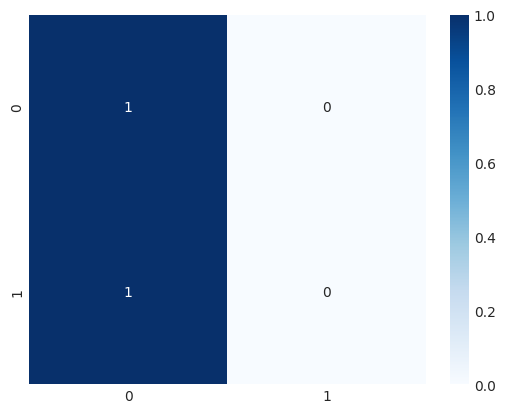

In [87]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Convert continuous predictions to binary (0 or 1)
# Values >= 0.5 become 1, values < 0.5 become 0
y_pred_binary = (y_pred >= 0.5).astype(int)

# 2. Use the binary version for the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# 3. Plot the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")


 **Key Performance Visualizations**

/tmp/ipython-input-943593971.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


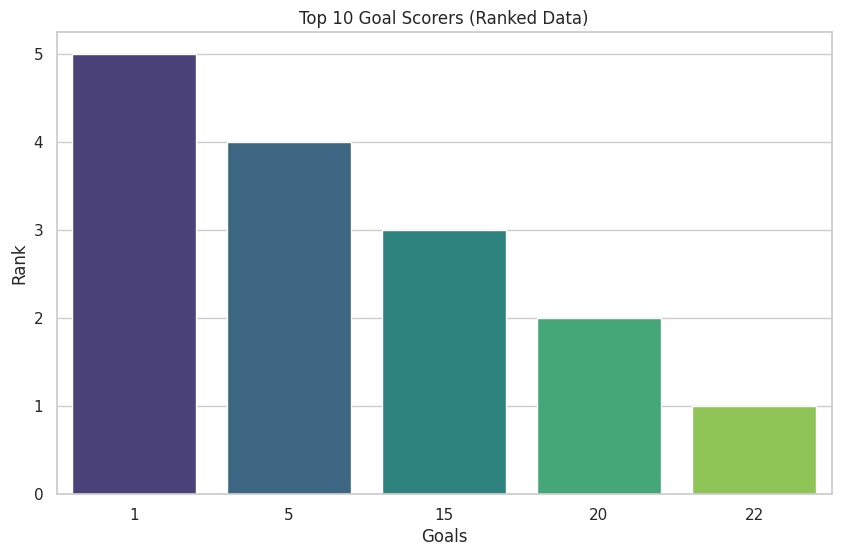

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check your columns again. There is no 'Name' or 'Player' column.
# The data only contains stats: ['index', 'Club', 'Position', 'Goals', 'Appearances', 'Age', 'Shots', 'Assists', 'Passes', 'Tackles', 'Tackle success %', 'Nationality']

# Get top 10 goals and create a 'Rank' column to plot against
top_scorers = df.nlargest(10, 'Goals').reset_index(drop=True)
top_scorers['Rank'] = range(1, len(top_scorers) + 1) # Create a rank number 1-10

plt.figure(figsize=(10, 6))

# Plot Rank vs Goals since you have no name column
sns.barplot(
    x='Goals',
    y='Rank',
    data=top_scorers,
    palette='viridis'
)

plt.title('Top 10 Goal Scorers (Ranked Data)')
plt.show() # Use plt.show() in a notebook environment

# Note: The NameError for 'st' is fixed because we are no longer using st.error()


In [93]:
!pip install gradio scikit-learn joblib pandas numpy


In [94]:
import gradio as gr
import pandas as pd
import numpy as np
import joblib

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression


In [95]:
import gradio as gr
import numpy as np
import joblib


In [96]:
from sklearn.ensemble import RandomForestRegressor

X_player = [
    [90, 5, 40],   # fitness, injury_count, minutes_played
    [80, 2, 30],
    [70, 1, 20]
]

y_goals = [2, 1, 0]
y_assists = [1, 0, 0]

goals_model = RandomForestRegressor(random_state=42)
assists_model = RandomForestRegressor(random_state=42)

goals_model.fit(X_player, y_goals)
assists_model.fit(X_player, y_assists)

joblib.dump(goals_model, "goals_model.pkl")
joblib.dump(assists_model, "assists_model.pkl")


['assists_model.pkl']

In [98]:
import joblib

# Correct path to your model
model_path = "/content/drive/MyDrive/YourProjectModels/match_model.pkl"

# Load the model
model = joblib.load(model_path)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [102]:
import os
import joblib

match_model = joblib.load("models/match_outcome_model.pkl")

print("✅ Match model loaded")

goals_model = joblib.load("goals_model.pkl")
assists_model = joblib.load("assists_model.pkl")


✅ Match model loaded


In [103]:
import os
print(os.listdir("models"))


['match_outcome_pipeline.pkl', 'player_performance_pipeline.pkl', 'match_outcome_model.pkl']


In [104]:
def predict_match(home_rating, away_rating, home_form, away_form):
    try:
        # Gradio inputs come as float
        home_rating = int(home_rating)
        away_rating = int(away_rating)
        home_form = int(home_form)
        away_form = int(away_form)

        # Clamp to training range
        home_rating = max(50, min(home_rating, 100))
        away_rating = max(50, min(away_rating, 100))
        home_form = max(1, min(home_form, 5))
        away_form = max(1, min(away_form, 5))

        features = [[home_rating, away_rating, home_form, away_form]]
        result = match_model.predict(features)[0]

        return f"🏆 Predicted Match Outcome: {result}"

    except Exception as e:
        return f"❌ Error: {str(e)}"



In [105]:
def predict_player(fitness, injuries, minutes):
    features = [[fitness, injuries, minutes]]

    goals = goals_model.predict(features)[0]
    assists = assists_model.predict(features)[0]

    return (
        f"⚽ Predicted Goals: {round(goals, 2)}\n"
        f"🎯 Predicted Assists: {round(assists, 2)}"
    )


In [106]:
with gr.Blocks(title="EPL Prediction App") as app:

    gr.Markdown("# ⚽ EPL Match & Player Prediction System")

    with gr.Tabs():

        # -------- SCREEN 1 --------
        with gr.Tab("Match Outcome Prediction"):
            gr.Markdown("### Predict Win or Loss")

            home_rating = gr.Number(label="Home Team Rating (50–100)", value=80)
            away_rating = gr.Number(label="Away Team Rating (50–100)", value=75)
            home_form = gr.Number(label="Home Team Recent Form (1–5)", value=3)
            away_form = gr.Number(label="Away Team Recent Form (1–5)", value=2)

            btn1 = gr.Button("Predict Match Outcome")
            output1 = gr.Textbox(label="Prediction")

            btn1.click(
                predict_match,
                inputs=[home_rating, away_rating, home_form, away_form],
                outputs=output1
            )

        # -------- SCREEN 2 --------
        with gr.Tab("Player Performance Prediction"):
            gr.Markdown("### Predict Goals & Assists")

            fitness = gr.Number(label="Player Fitness Level", value=85)
            injuries = gr.Number(label="Number of Injuries", value=1)
            minutes = gr.Number(label="Minutes Played", value=30)

            btn2 = gr.Button("Predict Player Performance")
            output2 = gr.Textbox(label="Prediction")

            btn2.click(
                predict_player,
                inputs=[fitness, injuries, minutes],
                outputs=output2
            )


In [32]:
app.launch(share=True)


Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4653710d9b87fb1418.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
